In [ ]:
# Introduction Cell
"""
This project uses supervised machine learning to predict CO₂ emissions by country based on historical data.
Aligned with UN Sustainable Development Goal 13 (Climate Action), it provides policymakers a tool to forecast emissions trends.
"""


In [ ]:
# Goal description
"""
Goal: Use machine learning to forecast carbon dioxide emissions and help identify countries at risk of exceeding sustainability thresholds.
This supports SDG 13: Climate Action.
"""


In [1]:
# DATASET OVERVIEW
import pandas as pd

# Load dataset (replace with your path or URL)
df = pd.read_csv("global_emissions.csv")

# Preview
df.head()


,Year,Country.Name,Country.Code,Country.GDP,Country.Population,Emissions.Production.CH4,Emissions.Production.N2O,Emissions.Production.CO2.Cement,Emissions.Production.CO2.Coal,Emissions.Production.CO2.Gas,Emissions.Production.CO2.Oil,Emissions.Production.CO2.Flaring,Emissions.Production.CO2.Other,Emissions.Production.CO2.Total,Emissions.Global Share.CO2.Cement,Emissions.Global Share.CO2.Coal,Emissions.Global Share.CO2.Gas,Emissions.Global Share.CO2.Oil,Emissions.Global Share.CO2.Flaring,Emissions.Global Share.CO2.Total
0,1992,Afghanistan,AFG,1.267754e+10,14485543,7.13,2.89,0.046,0.022,0.363,0.927,0.022,0.000000e+00,1.379,0.01,0.0,0.01,0.01,0.01,0.01
1,1993,Afghanistan,AFG,9.834581e+09,15816601,7.21,2.93,0.047,0.018,0.352,0.894,0.022,0.000000e+00,1.333,0.01,0.0,0.01,0.01,0.01,0.01
2,1994,Afghanistan,AFG,7.919857e+09,17075728,7.47,2.76,0.047,0.015,0.338,0.860,0.022,2.220446e-16,1.282,0.01,0.0,0.01,0.01,0.01,0.01
3,1995,Afghanistan,AFG,1.230753e+10,18110662,7.83,2.88,0.047,0.015,0.322,0.824,0.022,2.220446e-16,1.230,0.01,0.0,0.01,0.01,0.01,0.01
4,1996,Afghanistan,AFG,1.207013e+10,18853444,8.67,3.12,0.047,0.007,0.308,0.780,0.022,1.000000e-03,1.165,0.01,0.0,0.01,0.01,0.01,0.00


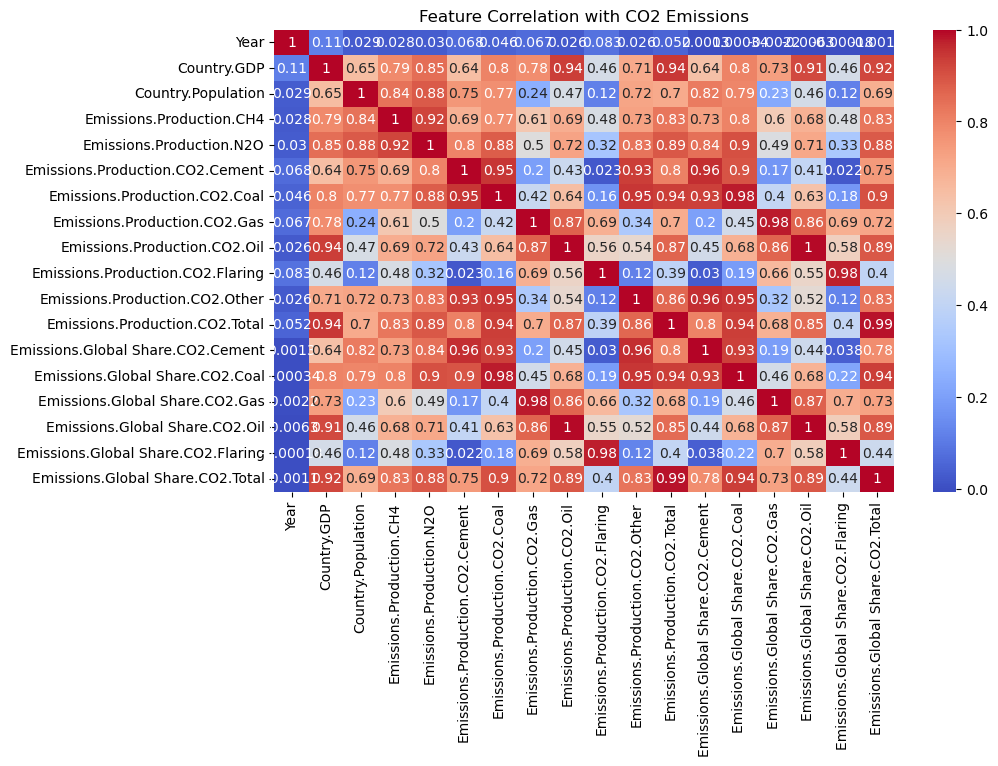

In [4]:
# EXPLORATORY DATA ANALYSIS


import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation with CO2 Emissions")
plt.show()

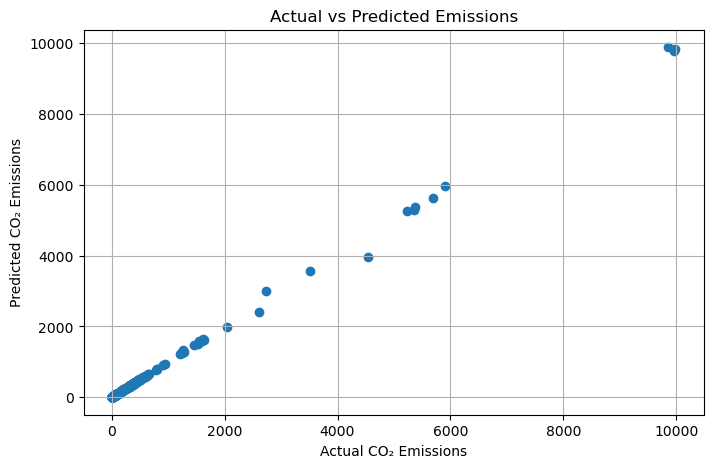

In [13]:
# RESULTS AND VISUALIZATIONS
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual CO₂ Emissions")
plt.ylabel("Predicted CO₂ Emissions")
plt.title("Actual vs Predicted Emissions")
plt.grid(True)
plt.show()


In [10]:
# FEATURE ENGINEERING

from sklearn.preprocessing import MinMaxScaler

# Target column
target_column = 'Emissions.Production.CO2.Total'

# Drop categorical and target columns to define features
categorical_columns = ['Country.Name', 'Country.Code']
feature_columns = df.drop(columns=categorical_columns + [target_column]).select_dtypes(include=['number']).columns.tolist()

# Define X and y
X = df[feature_columns]
y = df[target_column]

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Optional: Keep DataFrame structure for readability
X_scaled_df = pd.DataFrame(X_scaled, columns=feature_columns)

# Show preview
X_scaled_df.head()


,Year,Country.GDP,Country.Population,Emissions.Production.CH4,Emissions.Production.N2O,Emissions.Production.CO2.Cement,Emissions.Production.CO2.Coal,Emissions.Production.CO2.Gas,Emissions.Production.CO2.Oil,Emissions.Production.CO2.Flaring,Emissions.Production.CO2.Other,Emissions.Global Share.CO2.Cement,Emissions.Global Share.CO2.Coal,Emissions.Global Share.CO2.Gas,Emissions.Global Share.CO2.Oil,Emissions.Global Share.CO2.Flaring,Emissions.Global Share.CO2.Total
0,0.000000,0.000698,0.009966,0.005694,0.005031,0.000058,2.935895e-06,0.000221,0.000215,0.000289,0.000000e+00,0.00019,0.0,0.000353,0.000416,0.000555,0.000354
1,0.038462,0.000542,0.010899,0.005763,0.005104,0.000060,2.402096e-06,0.000214,0.000202,0.000289,0.000000e+00,0.00019,0.0,0.000353,0.000416,0.000555,0.000354
2,0.076923,0.000436,0.011781,0.005987,0.004796,0.000060,2.001747e-06,0.000206,0.000189,0.000289,1.294441e-18,0.00019,0.0,0.000353,0.000416,0.000555,0.000354
3,0.115385,0.000678,0.012506,0.006297,0.005013,0.000060,2.001747e-06,0.000196,0.000176,0.000289,1.294441e-18,0.00019,0.0,0.000353,0.000416,0.000555,0.000354
4,0.153846,0.000665,0.013026,0.007020,0.005447,0.000060,9.341485e-07,0.000188,0.000159,0.000289,5.829646e-06,0.00019,0.0,0.000353,0.000416,0.000555,0.000000


In [11]:
# MODEL BUILDING & TRAINING

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [2]:
# DATA PREPROCESSING

# Check for missing values
df.isnull().sum()

# Fill or drop missing data
df = df.dropna()

# Rename and convert columns as needed
df.columns = df.columns.str.strip()


In [12]:
# MODEL EVALUATION
from sklearn.metrics import mean_squared_error, r2_score

# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))


R² Score: 0.9989319136478634
RMSE: 32.747679195965


In [ ]:
# ETHICAL CONSIDERATION

"""
Fairness: Data imbalance between developed and developing countries may affect accuracy.
Bias: Historical emissions may not account for recent green transitions.
Transparency: Models should be interpretable and open for policy review.
"""


In [ ]:
# CONCLUSION AND FEATURE WORK

"""
Conclusion:
This model provides a robust predictor for country-level CO₂ emissions using accessible socioeconomic data.

Next Steps:
- Improve feature granularity (e.g., renewables data, urbanization).
- Deploy model with real-time dashboards.
- Add model explainability using SHAP.

"""
